<a href="https://colab.research.google.com/github/KudoTabieru/FashionMNIST/blob/main/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#FASHION MNIST




# 1.Import library

In [ ]:
import tensorflow as tf
from tensorflow import keras 
print(f"Tensorflow: {tf.__version__} \nKeras:{keras.__version__} ")
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras import layers

Tensorflow: 2.12.0 
Keras:2.12.0 


#2. Load Dataset

In [ ]:
(X_train,y_train),(X_test,y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [ ]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
X_train.dtype

dtype('uint8')

In [ ]:
X_train[0];

In [ ]:
y_train[0],y_train[1],y_train[2]

(9, 0, 0)

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]
class_nums = len(class_names)
print(class_nums)

10


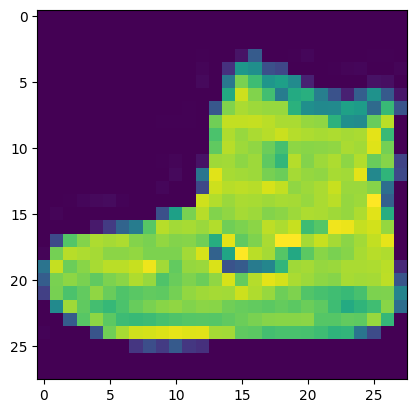

In [ ]:
plt.imshow(X_train[0])

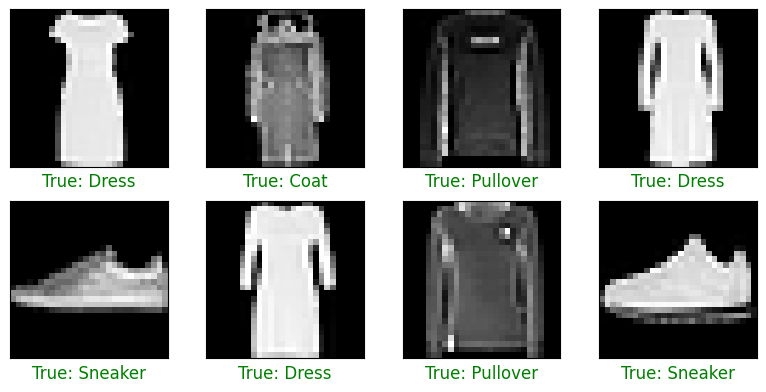

In [ ]:
def plot_data(x_data: np.ndarray,y_data: np.ndarray) -> None:
  nrows,ncols = 2,4
  len_x = x_data.shape[0]
  fig, axes = plt.subplots(nrows,ncols, figsize=(8,4))
  for idx in range(nrows*ncols):
    ax = axes[idx // ncols, idx % ncols]
    img_idx = random.randint(0, len_x)

    ax.imshow(x_data[img_idx],cmap='gray')
    ax.set(xticks=[],yticks=[])

    true_label_str=f"True: {class_names[y_data[img_idx]]}"
    ax.set_xlabel(true_label_str,color='green',fontsize=12)
  plt.tight_layout()
  plt.show()

plot_data(X_train,y_train)

#3. Image Pre-processing
_ We will reshape it into the shape the model expects and scaling it so that all values are in the [0,1] interval

_ Transform from unit8 int into float32

In [ ]:
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
# Make sure image have shape (6000,28,28) ==>(6000,28,28,1)
X_train = np.expand_dims(X_train, axis=-1)

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
# convert class vector to binary class matrics: 1 => [0 1 0 0 ...]
# 1                     => sparse_categorical_crossentropy
# [0 1 0 0 ...]         => categorical_crossentropy
y_train_label = keras.utils.to_categorical(y_train, class_nums)
y_test_label = keras.utils.to_categorical(y_test, class_nums)

In [ ]:
y_train_label[1],y_test_label[1]

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32))

#4. Network (ANN) Architecture

In [ ]:
input_shape=(28,28,1)

In [ ]:
from keras.api._v2.keras import activations
model = keras.models.Sequential([
    layers.Flatten(input_shape=input_shape), # convert (28,28,1)-> (784)
    layers.Dense(512, activation = 'relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(class_nums, activation='softmax')]





)
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dense_14 (Dense)            (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop',
              loss= 'categorical_crossentropy',
              metrics='accuracy')

In [ ]:
epochs = 10
batch_size=256
history = model.fit(X_train,y_train_label,
          epochs=epochs,
          batch_size=batch_size,
          validation_split=0.1)

Epoch 1/10
211/211 [==============================] - 6s 29ms/step - loss: 0.3677 - accuracy: 0.8635 - val_loss: 0.3738 - val_accuracy: 0.8652
Epoch 2/10
211/211 [==============================] - 5s 24ms/step - loss: 0.3305 - accuracy: 0.8775 - val_loss: 0.3516 - val_accuracy: 0.8687
Epoch 3/10
211/211 [==============================] - 4s 21ms/step - loss: 0.3092 - accuracy: 0.8848 - val_loss: 0.3167 - val_accuracy: 0.8838
Epoch 4/10
211/211 [==============================] - 6s 27ms/step - loss: 0.2919 - accuracy: 0.8919 - val_loss: 0.3141 - val_accuracy: 0.8847
Epoch 5/10
211/211 [==============================] - 4s 21ms/step - loss: 0.2759 - accuracy: 0.8956 - val_loss: 0.3193 - val_accuracy: 0.8833
Epoch 6/10
211/211 [==============================] - 5s 22ms/step - loss: 0.2594 - accuracy: 0.9022 - val_loss: 0.3098 - val_accuracy: 0.8838
Epoch 7/10
211/211 [==============================] - 6s 30ms/step - loss: 0.2486 - accuracy: 0.9056 - val_loss: 0.3423 - val_accuracy: 0.8753

In [ ]:
history_dict= history.history

In [ ]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
train_loss, val_loss = history_dict['loss'], history_dict['val_loss']
train_acc, val_acc = history_dict['accuracy'], history_dict['val_accuracy']

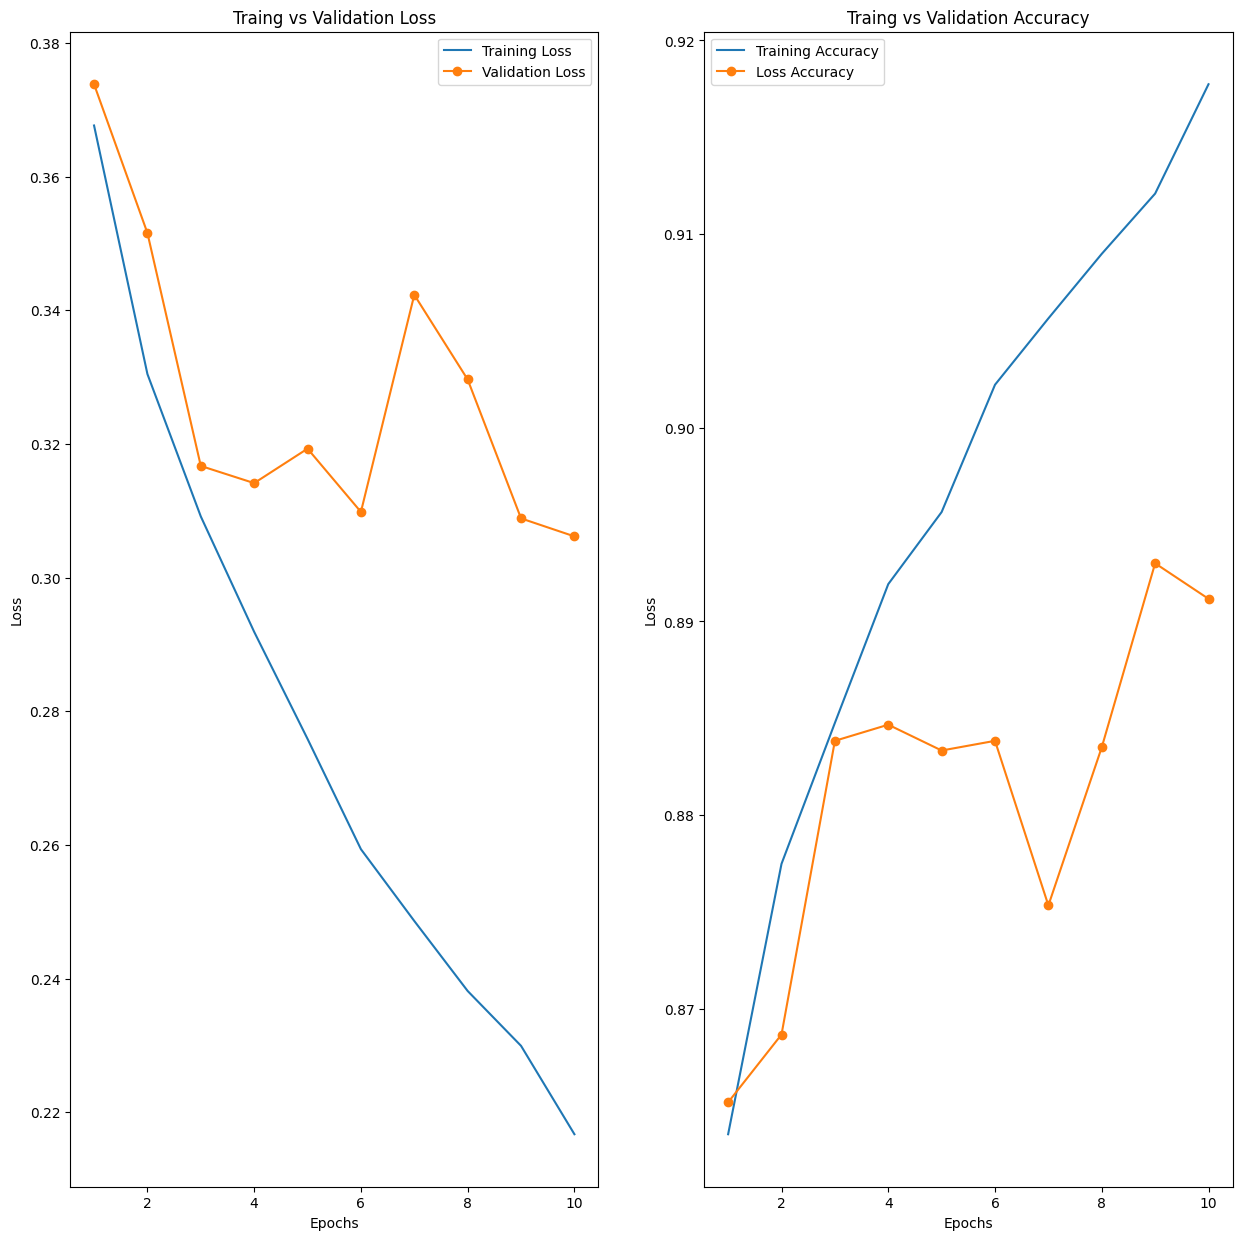

In [ ]:
fig,(ax1, ax2) = plt.subplots(1,2, figsize=(15,15))
epoch_runs = [i+1 for i in range(epochs)]

ax1.plot(epoch_runs, train_loss,label='Training Loss')
ax1.plot(epoch_runs, val_loss,label='Validation Loss',marker='o')
ax1.set(title='Traing vs Validation Loss',xlabel='Epochs',ylabel='Loss')
ax1.legend()

ax2.plot(epoch_runs, train_acc,label='Training Accuracy')
ax2.plot(epoch_runs, val_acc,label='Loss Accuracy',marker='o')
ax2.set(title='Traing vs Validation Accuracy',xlabel='Epochs',ylabel='Loss')
ax2.legend()

plt.show()

#5. Model Evaluation

In [ ]:
score= model.evaluate(X_test,y_test_label)

313/313 [==============================] - 1s 4ms/step - loss: 0.3445 - accuracy: 0.8829


In [ ]:
print(f"Test Loss:{score[0]:.4f}")
print(f"Test Accuracy:{score[1]:.4f}")


Test Loss:0.3445
Test Accuracy:0.8829


#6. Prediction

In [ ]:
x_sample = X_test[:3]
y_proba = model.predict(x_sample)

1/1 [==============================] - 0s 25ms/step


In [ ]:
y_proba.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   ,
        0.999],
       [0.   , 0.   , 0.999, 0.   , 0.001, 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [ ]:
predictions= np.argmax(y_proba, axis=1)

In [ ]:
predictions

array([9, 2, 1])

In [ ]:
[class_names[pred] for pred in predictions]

['Ankle boot', 'Pullover', 'Trouser']